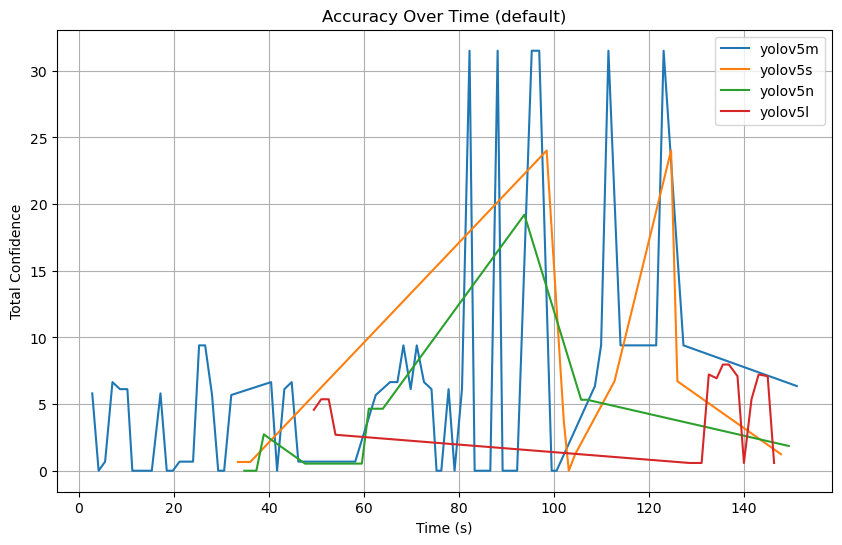

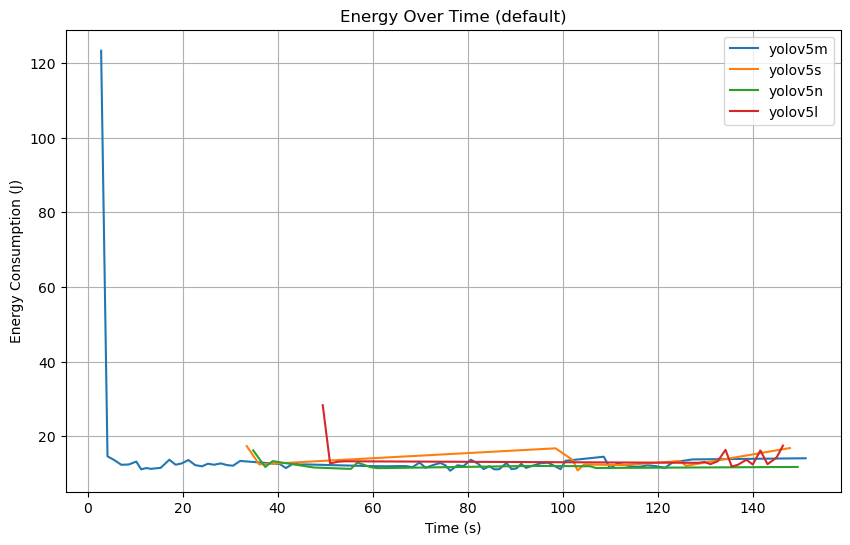

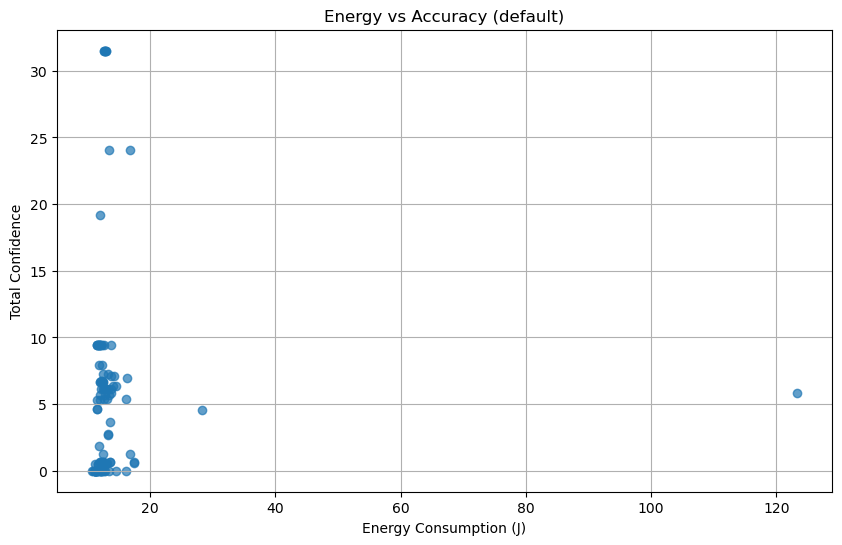

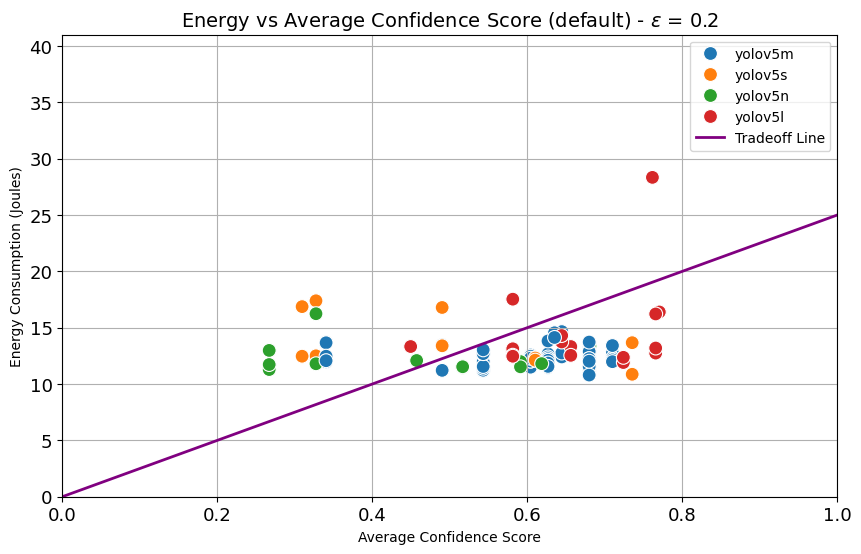

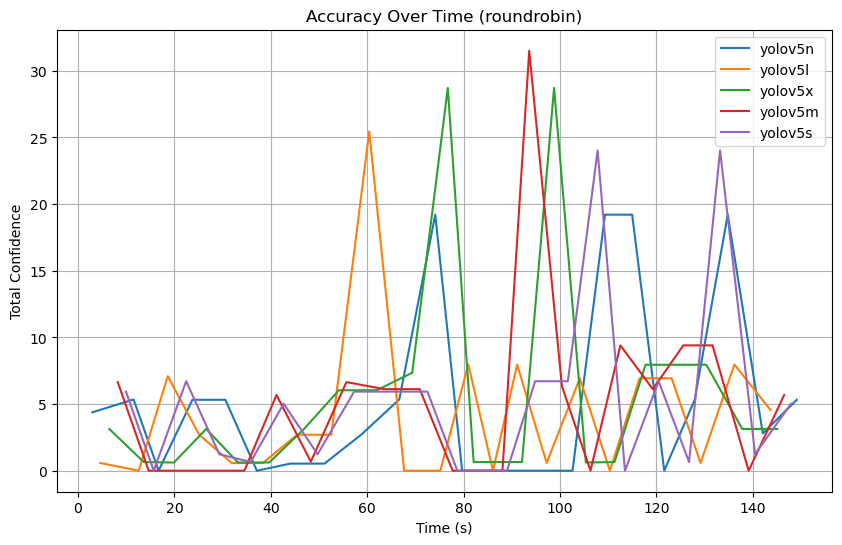

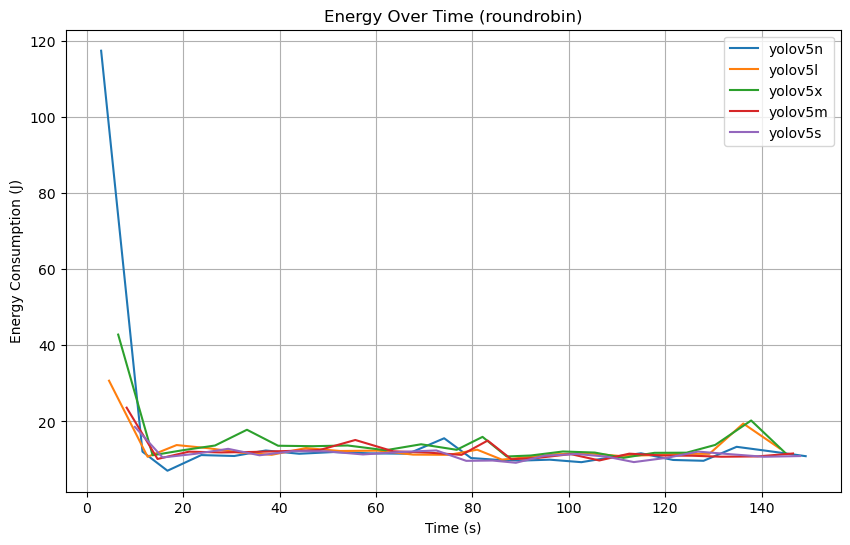

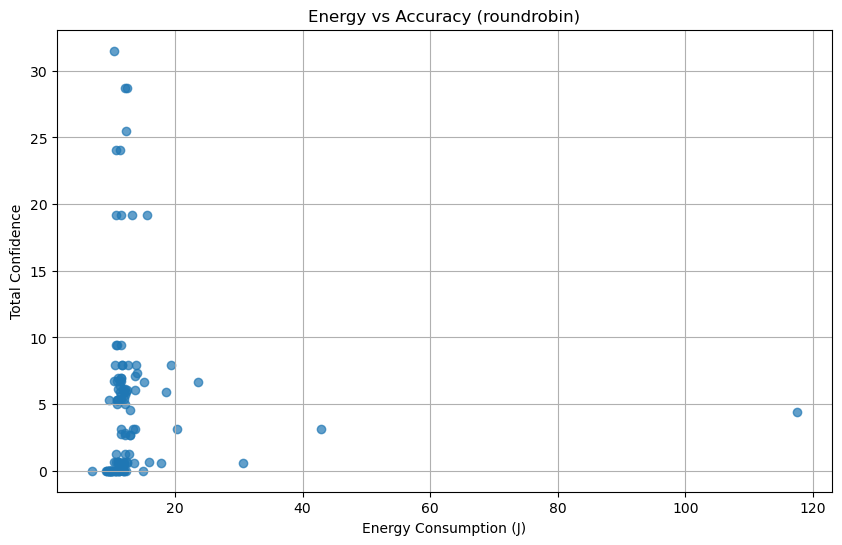

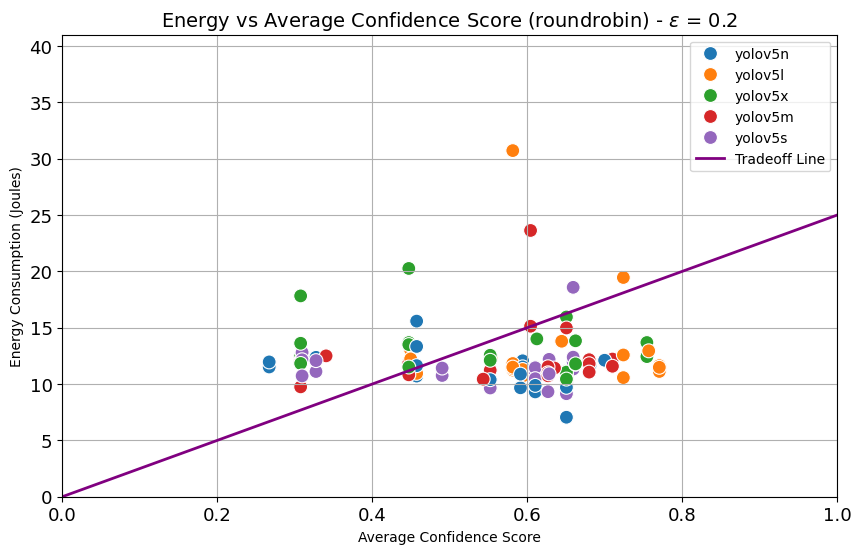

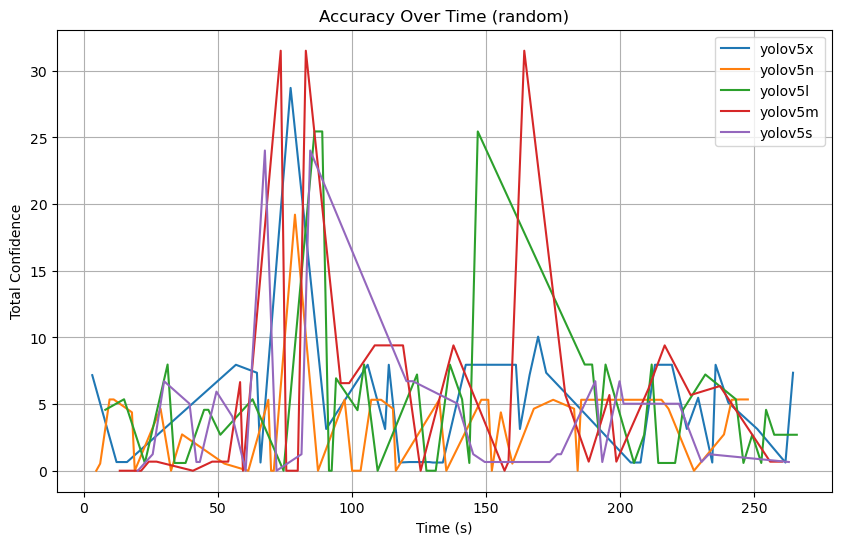

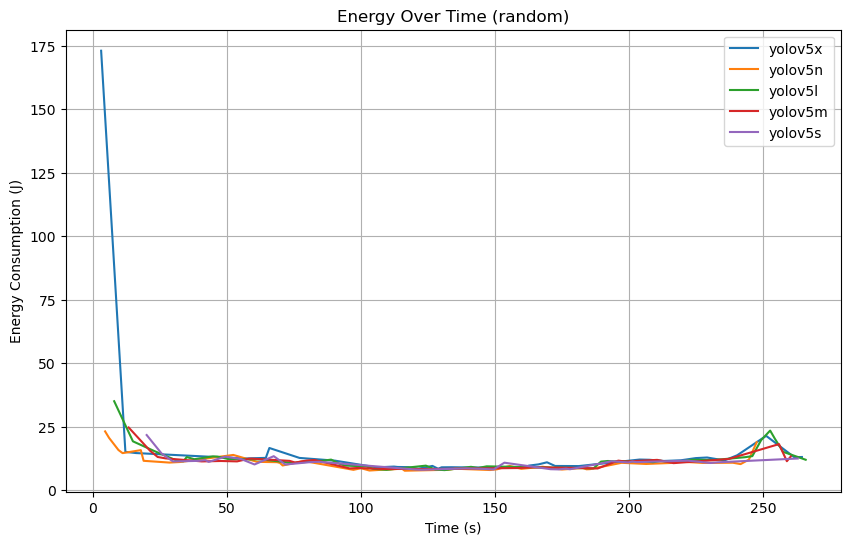

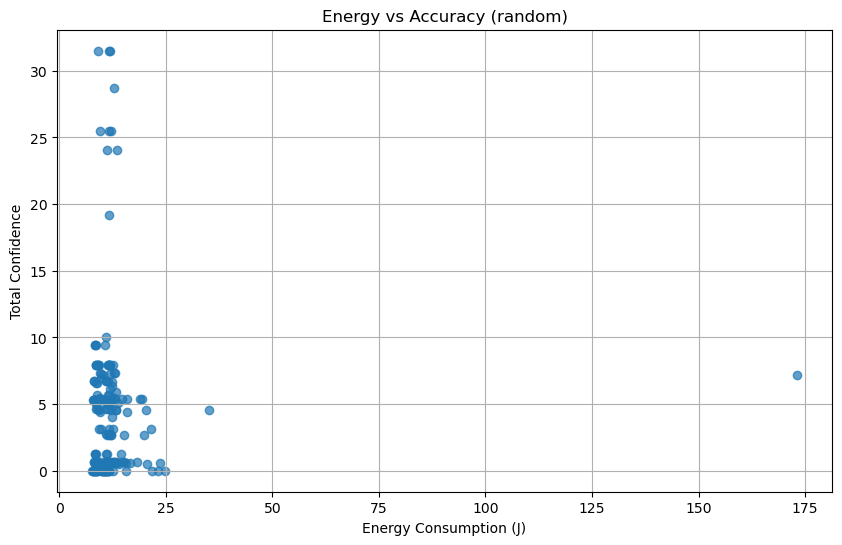

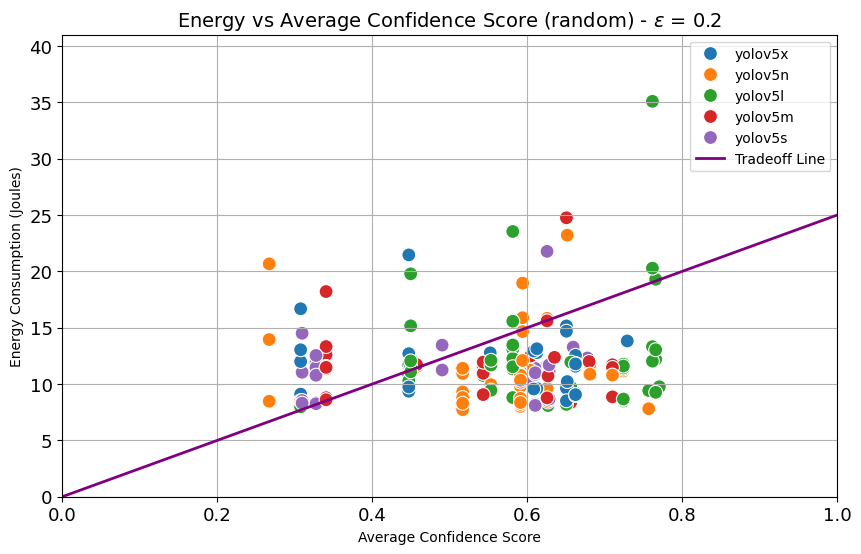

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# File paths for the CSV files
csv_files = {
    'default': './EcoData/default.csv',
    'roundrobin': './EcoData/roundrobin.csv',
    'random': './EcoData/random.csv'
}

# Load data into DataFrames
data = {name: pd.read_csv(path) for name, path in csv_files.items()}

# Function to plot accuracy over time per model
def plot_accuracy_over_time(data, name):
    plt.figure(figsize=(10, 6))
    for model in data['current_model'].unique():
        model_data = data[data['current_model'] == model]
        plt.plot(model_data['absolute_time'], model_data['total_conf'], label=model)
    plt.title(f'Accuracy Over Time ({name})')
    plt.xlabel('Time (s)')
    plt.ylabel('Total Confidence')
    plt.legend()
    plt.grid()
    plt.savefig(f'./EcoData/{name}_accuracy_over_time.png')
    plt.show()
    plt.close()

# Function to plot energy over time per model
def plot_energy_over_time(data, name):
    plt.figure(figsize=(10, 6))
    for model in data['current_model'].unique():
        model_data = data[data['current_model'] == model]
        plt.plot(model_data['absolute_time'], model_data['energy_consumption(J)'], label=model)
    plt.title(f'Energy Over Time ({name})')
    plt.xlabel('Time (s)')
    plt.ylabel('Energy Consumption (J)')
    plt.legend()
    plt.grid()
    plt.savefig(f'./EcoData/{name}_energy_over_time.png')
    plt.show()
    plt.close()

# Function to plot energy vs accuracy for each scheduling algorithm
def plot_energy_vs_accuracy(data, name):
    plt.figure(figsize=(10, 6))
    plt.scatter(data['energy_consumption(J)'], data['total_conf'], alpha=0.7)
    plt.title(f'Energy vs Accuracy ({name})')
    plt.xlabel('Energy Consumption (J)')
    plt.ylabel('Total Confidence')
    plt.grid()
    plt.savefig(f'./EcoData/{name}_energy_vs_accuracy.png')
    plt.show()
    plt.close()

# Function to plot scatter and tradeoff line graph
def plot_energy_vs_avg_conf(data, name, epsilon=0.2):
    plt.figure(figsize=(10, 6), dpi=100)
    hue_order = data["current_model"].unique()
    sns.scatterplot(data=data, x="avg_conf", y="energy_consumption(J)", hue="current_model", hue_order=hue_order, s=100)
    
    # Adding the tradeoff line
    x_tradeoff = np.linspace(0, 1, 11)  # x values from 0 to 1
    y_tradeoff = 5 * x_tradeoff / epsilon  # y = 5 * x / epsilon
    sns.lineplot(x=x_tradeoff, y=y_tradeoff, color="purple", linewidth=2, label='Tradeoff Line')

    plt.xlim(0, 1)
    plt.ylim(0, 41)
    plt.tick_params(left=True, bottom=True, labelsize=13, direction='out')

    plt.title(rf"Energy vs Average Confidence Score ({name}) - $\epsilon$ = {epsilon}", fontsize=14)
    plt.xlabel("Average Confidence Score")
    plt.ylabel("Energy Consumption (Joules)")
    plt.legend()
    plt.grid()
    plt.savefig(f'./EcoData/{name}_energy_vs_avg_conf.png')
    plt.show()
    plt.close()

# Generate plots for each scheduling algorithm
for name, df in data.items():
    plot_accuracy_over_time(df, name)
    plot_energy_over_time(df, name)
    plot_energy_vs_accuracy(df, name)
    plot_energy_vs_avg_conf(df, name)